#### Understanding Data

In [87]:
#initial size of the data
import pandas as pd

PATH = "/content/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(PATH)
print(df.shape)

(32065, 26)


In [90]:
# 2) Dtypes
print("Data types of each attribute:")
print(df.dtypes, "\n")


Data types of each attribute:
timestamp                           object
vehicle_gps_latitude               float64
vehicle_gps_longitude              float64
fuel_consumption_rate              float64
eta_variation_hours                float64
traffic_congestion_level           float64
warehouse_inventory_level          float64
loading_unloading_time             float64
handling_equipment_availability    float64
order_fulfillment_status           float64
weather_condition_severity         float64
port_congestion_level              float64
shipping_costs                     float64
supplier_reliability_score         float64
lead_time_days                     float64
historical_demand                  float64
iot_temperature                    float64
cargo_condition_status             float64
route_risk_level                   float64
customs_clearance_time             float64
driver_behavior_score              float64
fatigue_monitoring_score           float64
disruption_likelihood_sc

In [89]:
miss = df.isna().sum()
miss_pct = (df.isna().mean() * 100).round(2)
missing_tbl = pd.concat([miss.rename("count"), miss_pct.rename("percent_%")], axis=1)
print("Missing values (count and proportion):")
print(missing_tbl[missing_tbl["count"] > 0].sort_values("percent_%", ascending=False), "\n")


Missing values (count and proportion):
Empty DataFrame
Columns: [count, percent_%]
Index: [] 



In [91]:
# 4) Unique values in categorical (object/category/bool)
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns
print("Unique values in categorical features:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print("Examples:", df[col].unique()[:10])  # up to 10 examples
    print()


Unique values in categorical features:
timestamp: 32065 unique values
Examples: ['2021-01-01 00:00:00' '2021-01-01 01:00:00' '2021-01-01 02:00:00'
 '2021-01-01 03:00:00' '2021-01-01 04:00:00' '2021-01-01 05:00:00'
 '2021-01-01 06:00:00' '2021-01-01 07:00:00' '2021-01-01 08:00:00'
 '2021-01-01 09:00:00']

risk_classification: 3 unique values
Examples: ['Moderate Risk' 'High Risk' 'Low Risk']



In [92]:
# 5) Unique values in numerical (all numeric types)
numeric_cols = df.select_dtypes(include="number").columns
print("Unique values in numerical features:")
for col in numeric_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print("Examples:", df[col].unique()[:10])  # up to 10 examples
    print()

Unique values in numerical features:
vehicle_gps_latitude: 32065 unique values
Examples: [40.37556848 33.50781834 30.02063979 36.64922251 30.00127928 47.86454911
 33.84639038 32.60188466 39.78719415 47.72849911]

vehicle_gps_longitude: 32065 unique values
Examples: [ -77.01431774 -117.03690241  -75.26922404  -70.1905293   -70.01219476
 -119.99838573  -95.94011786 -102.31663498  -90.89791849 -113.41356063]

fuel_consumption_rate: 32037 unique values
Examples: [5.13651186 5.10151153 5.09080262 8.2195575  5.00007488 5.53356273
 5.77980365 5.47469457 5.68060734 5.0884254 ]

eta_variation_hours: 32065 unique values
Examples: [4.99800922 0.98492942 4.9726651  3.09506354 3.21607673 4.86238648
 4.99997906 0.37551117 4.95887507 1.5087091 ]

traffic_congestion_level: 32065 unique values
Examples: [5.9275858  1.59199219 8.78776535 0.04525715 8.0048509  0.49940495
 8.75050112 4.81307828 9.61316081 9.89740737]

warehouse_inventory_level: 32065 unique values
Examples: [9.85716862e+02 3.96700206e+02 

### Finding Min and Max of Each Value

In [93]:
# Get min and max values, formatted as decimals
num_summary = df.describe().T[['min', 'max']].applymap(lambda x: f"{x:.6f}")
num_summary

/tmp/ipython-input-3448295976.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_summary = df.describe().T[['min', 'max']].applymap(lambda x: f"{x:.6f}")


,min,max
vehicle_gps_latitude,30.000000,50.000000
vehicle_gps_longitude,-119.999998,-70.000000
fuel_consumption_rate,5.000000,19.999875
eta_variation_hours,-1.999993,5.000000
traffic_congestion_level,0.000000,9.999999
warehouse_inventory_level,0.000000,999.999298
loading_unloading_time,0.500000,5.000000
handling_equipment_availability,0.000000,0.999999
order_fulfillment_status,0.000001,1.000000
weather_condition_severity,0.000000,1.000000


## Prepping Dataset

### Converting Dates from the Dataset to Hour,Day,Month,Peak Hour

In [94]:


# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Derive time features
df['month'] = df['timestamp'].dt.month       # 1–12
df['hour'] = df['timestamp'].dt.hour         # 0–23

# Map days of the week (Sunday = 1, Saturday = 7)
day_map = {
    "Sunday": 1,
    "Monday": 2,
    "Tuesday": 3,
    "Wednesday": 4,
    "Thursday": 5,
    "Friday": 6,
    "Saturday": 7
}
df['day_of_week'] = df['timestamp'].dt.day_name().map(day_map)

# Define peak vs off-peak hours (binary encoding)
def label_peak(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 1  # peak
    else:
        return 0  # off-peak

df['peak_hour'] = df['hour'].apply(label_peak)

print(df[['timestamp', 'day_of_week', 'month', 'hour', 'peak_hour']].head())


            timestamp  day_of_week  month  hour  peak_hour
0 2021-01-01 00:00:00            6      1     0          0
1 2021-01-01 01:00:00            6      1     1          0
2 2021-01-01 02:00:00            6      1     2          0
3 2021-01-01 03:00:00            6      1     3          0
4 2021-01-01 04:00:00            6      1     4          0


### Standardization using Z scores

In [95]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
cols_to_normalize = [
    'fuel_consumption_rate',
    'eta_variation_hours',
    'traffic_congestion_level',
    'warehouse_inventory_level',
    'loading_unloading_time',
    'handling_equipment_availability',
    'order_fulfillment_status',
    'weather_condition_severity',
    'port_congestion_level',
    'shipping_costs',
    'supplier_reliability_score',
    'lead_time_days',
    'historical_demand',
    'iot_temperature',
    'cargo_condition_status',
    'route_risk_level',
    'customs_clearance_time',
    'driver_behavior_score',
    'fatigue_monitoring_score',
    'disruption_likelihood_score',
    'delay_probability',
    'delivery_time_deviation'
]



In [96]:
# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df = df.copy()
df[cols_to_normalize] = minmax_scaler.fit_transform(df[cols_to_normalize])

print(df[cols_to_normalize].head())

   fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
0               0.009101             0.999716                  0.592759   
1               0.006767             0.426418                  0.159199   
2               0.006054             0.996095                  0.878777   
3               0.214639             0.727866                  0.004526   
4               0.000005             0.745154                  0.800485   

   warehouse_inventory_level  loading_unloading_time  \
0                   0.985718                0.989198   
1                   0.396700                0.117862   
2                   0.832410                0.826718   
3                   0.000573                0.006708   
4                   0.914926                0.693531   

   handling_equipment_availability  order_fulfillment_status  \
0                         0.481294                  0.761166   
1                         0.620781                  0.196593   
2                   

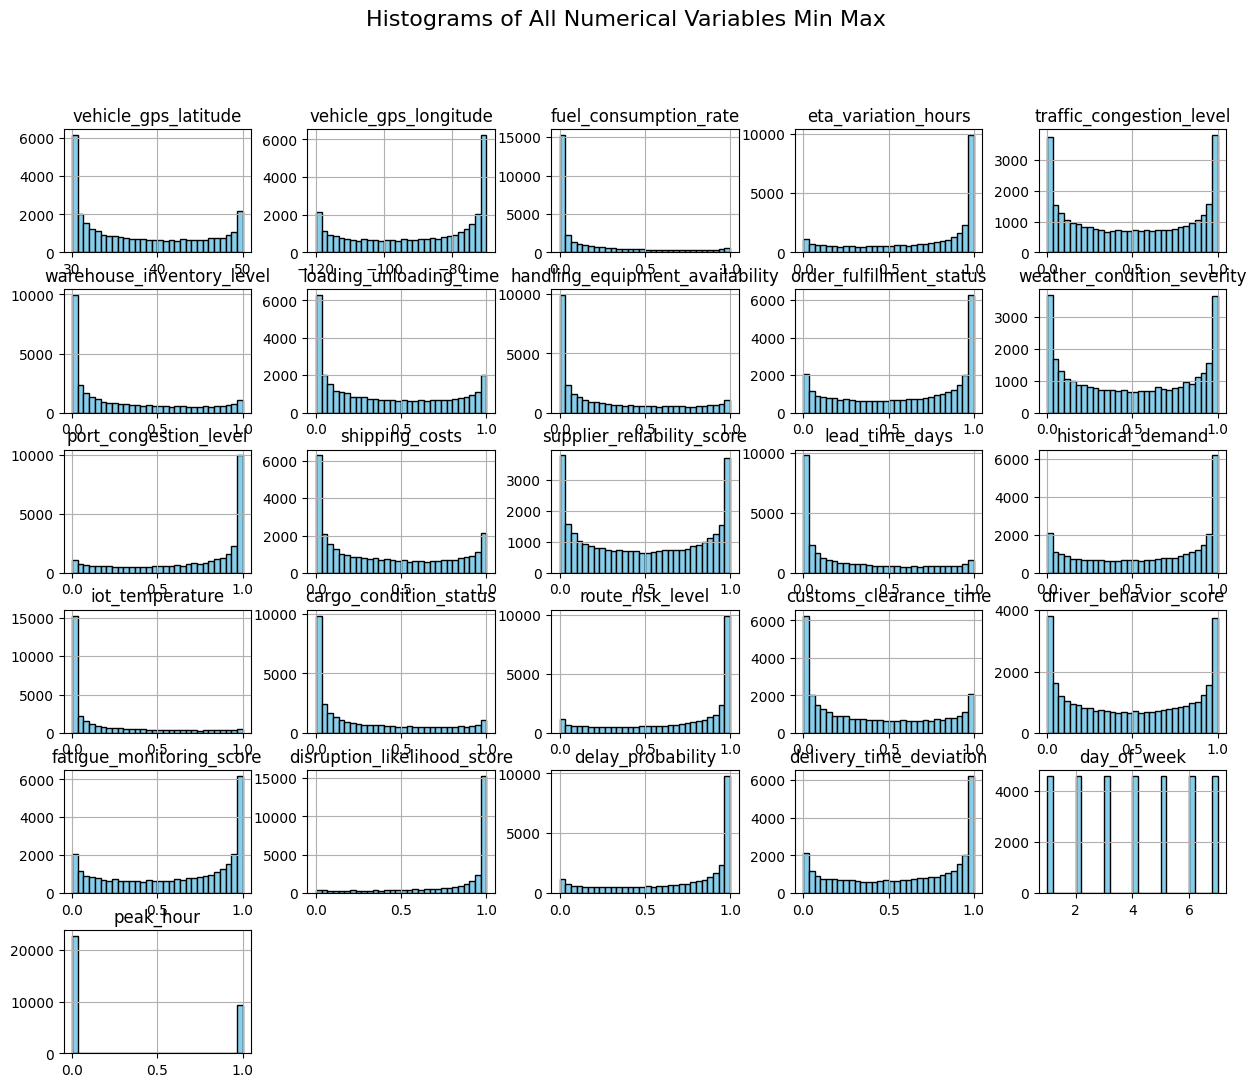

In [97]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Numerical Variables Min Max", fontsize=16)
plt.show()


Going with Min Max Standardization

Encoding Risk Classification

In [98]:
import pandas as pd

# Map categories to numeric values
risk_map = {
    "High Risk": 2,
    "Moderate Risk": 1,
    "Low Risk": 0
}

df['risk_classification_encoded'] = df['risk_classification'].map(risk_map)

print(df[['risk_classification', 'risk_classification_encoded']].head(10))


  risk_classification  risk_classification_encoded
0       Moderate Risk                            1
1           High Risk                            2
2           High Risk                            2
3           High Risk                            2
4           High Risk                            2
5           High Risk                            2
6           High Risk                            2
7       Moderate Risk                            1
8       Moderate Risk                            1
9           High Risk                            2


# Exploratory Data Analysis

## Feature Engineering

In [99]:
from sklearn.preprocessing import MinMaxScaler
df['fuel_efficiency_index'] = df['fuel_consumption_rate'] / (1 + np.exp(df['driver_behavior_score']))
df['congestion_stress'] = (df['traffic_congestion_level']**2 + df['port_congestion_level']**2) / (1 + df['hour'])
df['logistics_resilience'] = np.exp(-(df['eta_variation_hours']**2 + df['delay_probability'] + df['disruption_likelihood_score']))
df['inventory_pressure'] = np.log1p((df['historical_demand'] + 1) / (df['warehouse_inventory_level'] + 1))
df['loading_saturation'] = np.tanh(df['order_fulfillment_status'] / (df['loading_unloading_time'] + 0.1))
df['clearance_friction'] = np.sqrt(df['customs_clearance_time'] * (1 + df['port_congestion_level']))
df['human_performance_risk'] = df['driver_behavior_score'] * np.exp(1 - df['fatigue_monitoring_score'])



In [100]:
df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,day_of_week,peak_hour,risk_classification_encoded,fuel_efficiency_index,congestion_stress,logistics_resilience,inventory_pressure,loading_saturation,clearance_friction,human_performance_risk
0,2021-01-01 00:00:00,40.375568,-77.014318,0.009101,0.999716,0.592759,0.985718,0.989198,0.481294,0.761166,...,6,0,1,0.004473,0.535332,0.091552,0.407886,0.603625,0.025241,0.034576
1,2021-01-01 01:00:00,33.507818,-117.036902,0.006767,0.426418,0.159199,0.396700,0.117862,0.620781,0.196593,...,6,0,2,0.003044,0.258960,0.181447,0.738614,0.717452,0.420152,0.218836
2,2021-01-01 02:00:00,30.020640,-75.269224,0.006054,0.996095,0.878777,0.832410,0.826718,0.810934,0.152740,...,6,0,2,0.002629,0.564940,0.061166,0.487440,0.163342,0.440619,0.483913
3,2021-01-01 03:00:00,36.649223,-70.190529,0.214639,0.727866,0.004526,0.000573,0.006708,0.008525,0.811885,...,6,0,2,0.088058,0.198013,0.212443,0.808609,1.000000,1.324031,0.398873
4,2021-01-01 04:00:00,30.001279,-70.012195,0.000005,0.745154,0.800485,0.914926,0.693531,0.020083,0.053658,...,6,0,2,0.000002,0.128163,0.085537,0.488670,0.067517,0.811531,0.035588


In [107]:
from sklearn.preprocessing import MinMaxScaler

# =====================================================
# Normalize Engineered Features
# =====================================================
cols_to_normalize = [
    'fuel_efficiency_index',
    'congestion_stress',
    'logistics_resilience',
    'inventory_pressure',
    'clearance_friction',
    'human_performance_risk'
]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# =====================================================
# Keep only engineered + target features
# =====================================================
cols_to_keep = cols_to_normalize + [
    'risk_classification_encoded',
    'shipping_costs',
    'delivery_time_deviation','delay_probability','disruption_likelihood_score'
]

df_model = df[cols_to_keep].copy()

print("✅ Clean modeling dataset shape:", df_model.shape)
print(df_model.head())


✅ Clean modeling dataset shape: (32065, 11)
   fuel_efficiency_index  congestion_stress  logistics_resilience  \
0               0.008951           0.267719              0.045880   
1               0.006090           0.129506              0.144636   
2               0.005262           0.282526              0.012500   
3               0.176202           0.099026              0.178687   
4               0.000005           0.064094              0.039273   

   inventory_pressure  clearance_friction  human_performance_risk  \
0            0.003409            0.017848                0.012723   
1            0.480589            0.297093                0.080527   
2            0.118191            0.311566                0.178071   
3            0.581579            0.936235                0.146778   
4            0.119966            0.573841                0.013096   

   risk_classification_encoded  shipping_costs  delivery_time_deviation  \
0                            1        0.396115     

In [108]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Features (X) and categorical target (y)
X = df_model.drop(columns=['risk_classification_encoded'])
y = df_model['risk_classification_encoded']

y
print("Before SMOTE:", Counter(y))

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))

# Recombine into new balanced DataFrame
df_smote = X_resampled.copy()
df_smote['risk_classification_encoded'] = y_resampled

print("New shape:", df_smote.shape)


Before SMOTE: Counter({2: 23944, 1: 5011, 0: 3110})
After SMOTE: Counter({1: 23944, 2: 23944, 0: 23944})
New shape: (71832, 11)


In [109]:
df_smote.head()

,fuel_efficiency_index,congestion_stress,logistics_resilience,inventory_pressure,clearance_friction,human_performance_risk,shipping_costs,delivery_time_deviation,delay_probability,disruption_likelihood_score,risk_classification_encoded
0,0.008951,0.267719,0.045880,0.003409,0.017848,0.012723,0.396115,0.925890,0.885291,0.506128,1
1,0.006090,0.129506,0.144636,0.480589,0.297093,0.080527,0.600454,0.847940,0.544176,0.980783,2
2,0.005262,0.282526,0.012500,0.118191,0.311566,0.178071,0.061944,0.273633,0.803321,0.998633,2
3,0.176202,0.099026,0.178687,0.581579,0.936235,0.146778,0.004798,0.942075,0.025974,0.993320,2
4,0.000005,0.064094,0.039273,0.119966,0.573841,0.013096,0.974692,0.812707,0.991122,0.912429,2


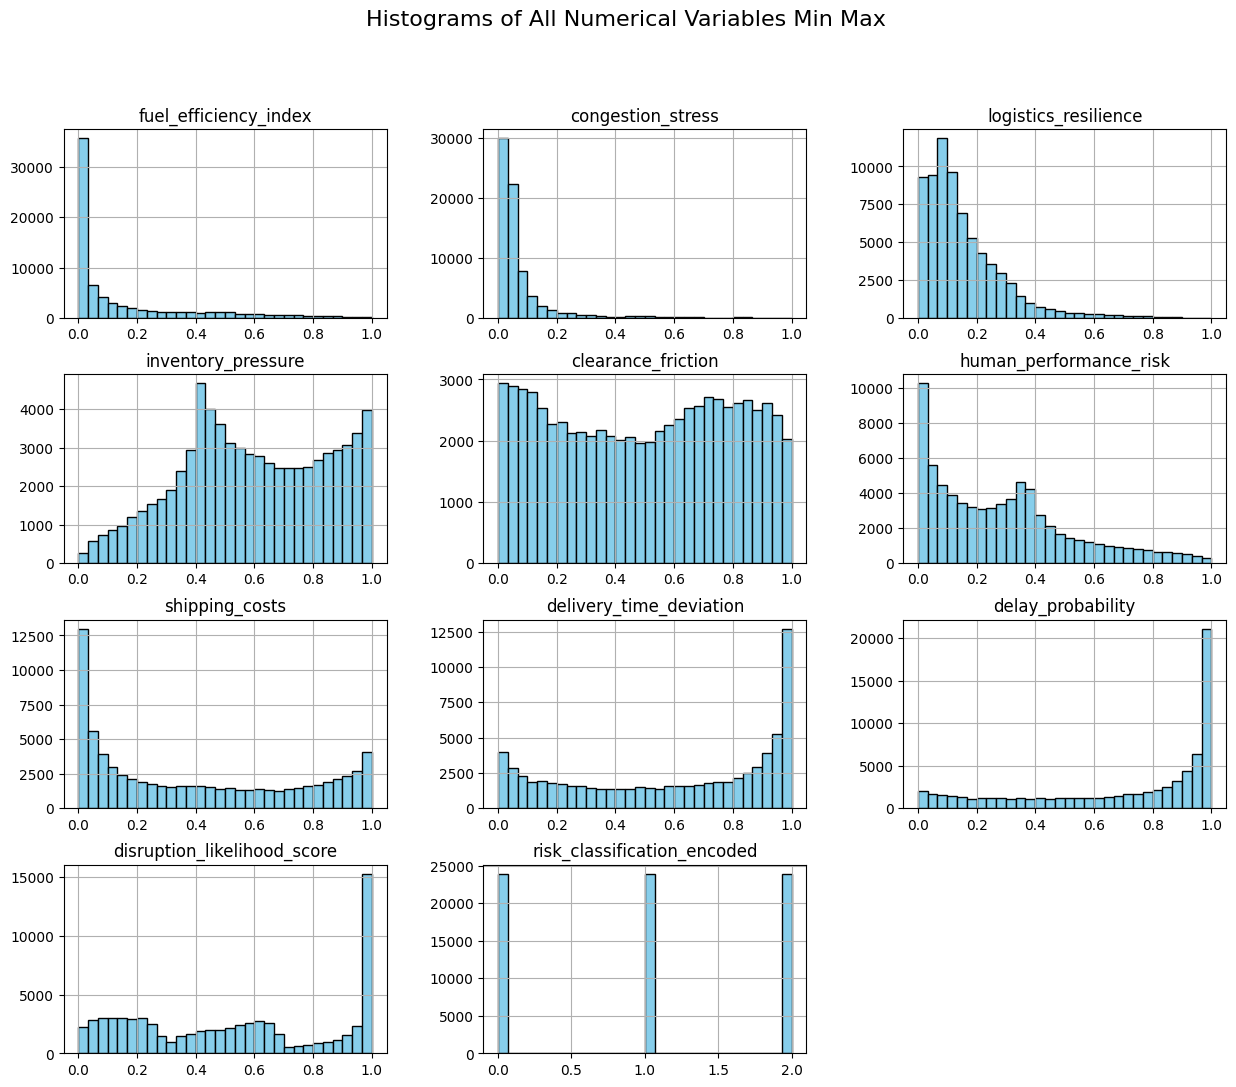

In [110]:
import matplotlib.pyplot as plt

numeric_cols = df_smote.select_dtypes(include=['float64', 'int64']).columns

df_smote[numeric_cols].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Numerical Variables Min Max", fontsize=16)
plt.show()

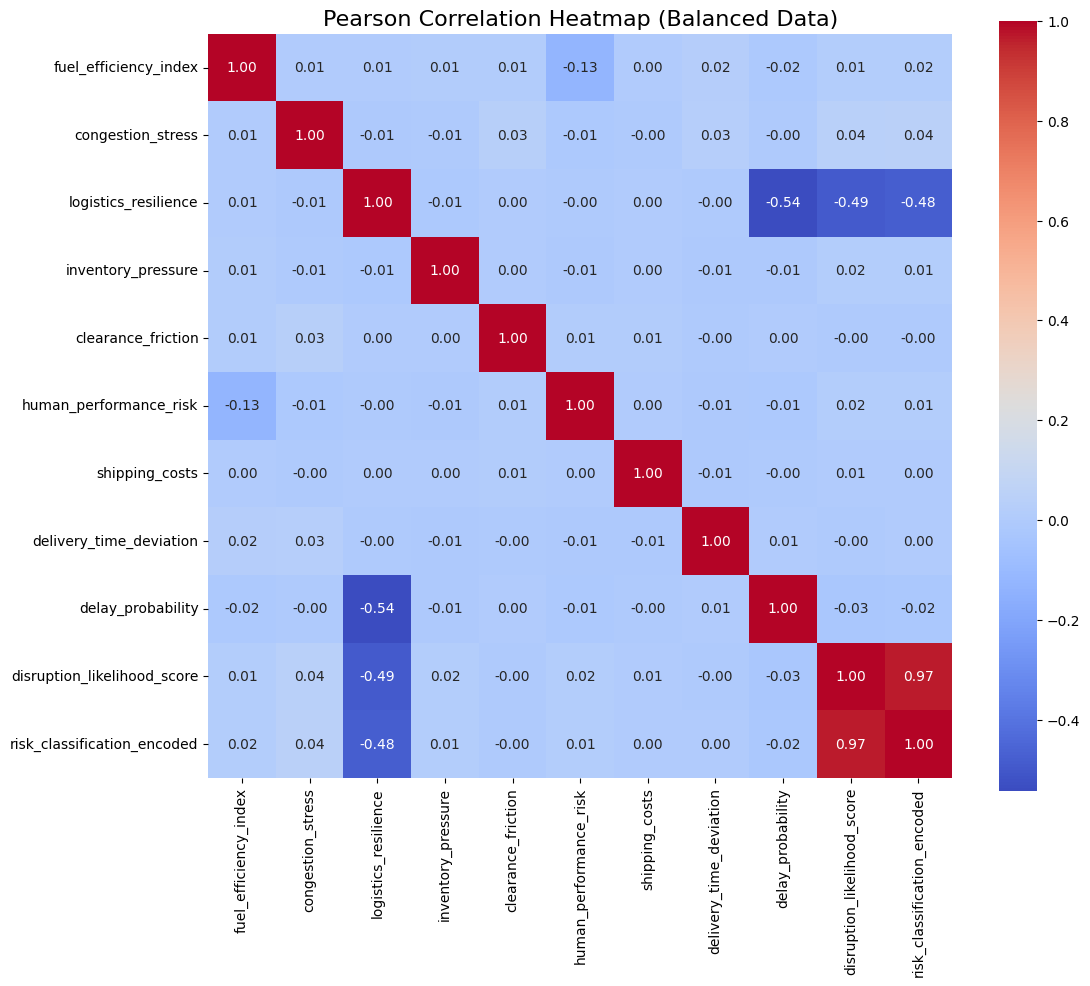

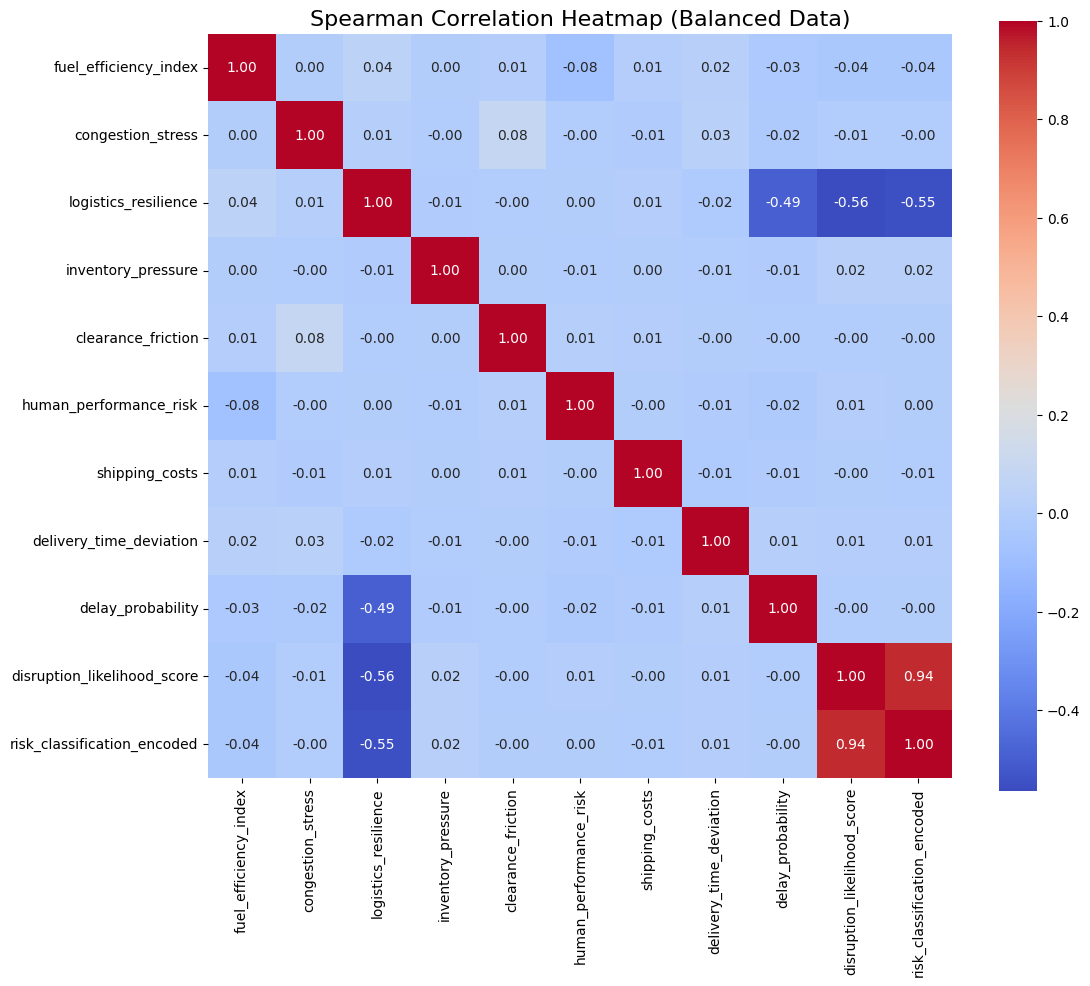


Correlation with Shipping Costs:
 shipping_costs                 1.000000
clearance_friction             0.006374
disruption_likelihood_score    0.005358
inventory_pressure             0.004530
logistics_resilience           0.003543
risk_classification_encoded    0.002695
fuel_efficiency_index          0.002135
human_performance_risk         0.000905
delay_probability             -0.002575
congestion_stress             -0.003067
delivery_time_deviation       -0.007292
Name: shipping_costs, dtype: float64

Correlation with Delivery Time Deviation:
 delivery_time_deviation        1.000000
congestion_stress              0.028371
fuel_efficiency_index          0.022516
delay_probability              0.006066
risk_classification_encoded    0.002849
disruption_likelihood_score   -0.000943
clearance_friction            -0.002422
logistics_resilience          -0.004438
human_performance_risk        -0.006296
shipping_costs                -0.007292
inventory_pressure            -0.007316
Name

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# =====================================================
# Correlation Heatmaps for df_smote
# =====================================================

# Keep only numeric columns
numeric_cols = df_smote.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_smote[numeric_cols].corr()
corr_spearman = df_smote[numeric_cols].corr(method='spearman')

# --- Pearson Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Pearson Correlation Heatmap (Balanced Data)", fontsize=16)
plt.show()

# --- Spearman Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_spearman, cmap="coolwarm", annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Spearman Correlation Heatmap (Balanced Data)", fontsize=16)
plt.show()

# --- Correlation with Targets
print("\nCorrelation with Shipping Costs:\n", corr_matrix['shipping_costs'].sort_values(ascending=False))
print("\nCorrelation with Delivery Time Deviation:\n", corr_matrix['delivery_time_deviation'].sort_values(ascending=False))
print("\nCorrelation with Risk Classification:\n", corr_matrix['risk_classification_encoded'].sort_values(ascending=False))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:26:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Results
Accuracy: 0.9997215841859818

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4789
           1       1.00      1.00      1.00      4789
           2       1.00      1.00      1.00      4789

    accuracy                           1.00     14367
   macro avg       1.00      1.00      1.00     14367
weighted avg       1.00      1.00      1.00     14367



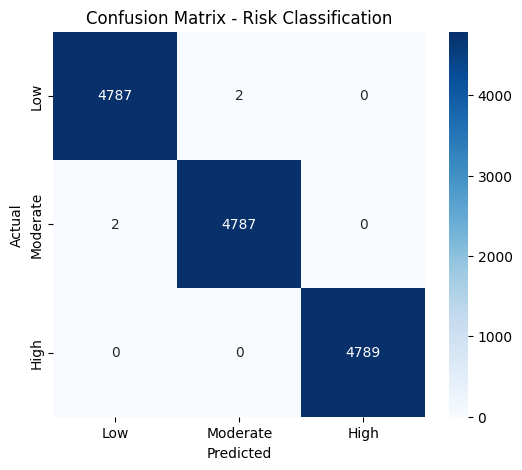

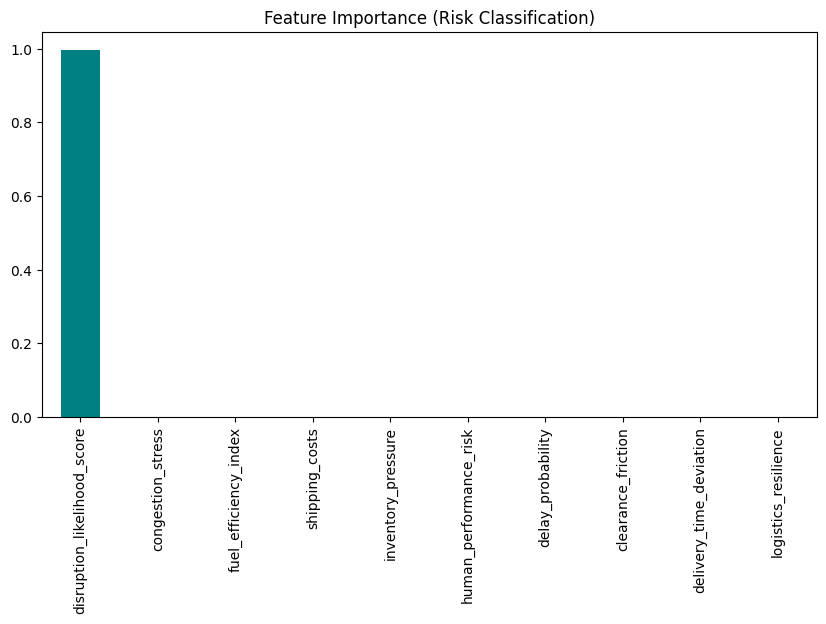


Disruption Likelihood Regression
R²: 0.9542527874149859
RMSE: 0.07301166748428242


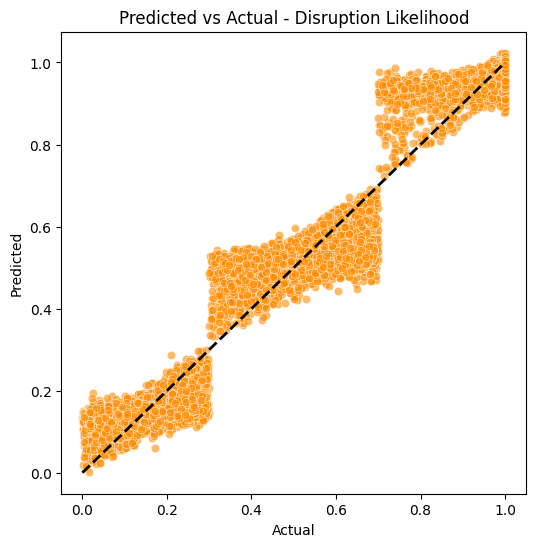


Delay Probability Regression
R²: 0.5423288597796395
RMSE: 0.21603478030769946


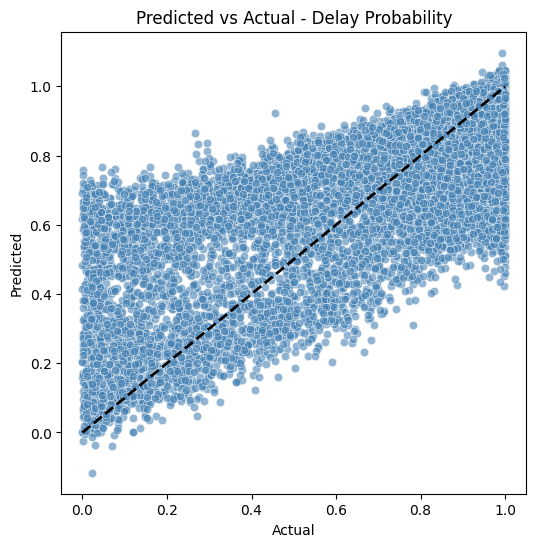


Delivery Time Deviation Regression
R²: 0.14217361897162906
RMSE: 0.32030664528935665


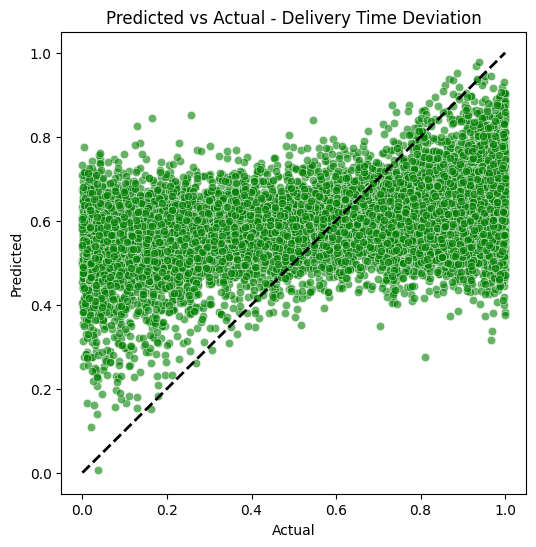

In [151]:
# =====================================================
# 1. CLASSIFICATION: Predict Risk Classification
# =====================================================
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
X_class = df_smote.drop(columns=['risk_classification_encoded'])
y_class = df_smote['risk_classification_encoded']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Model
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)

print("\nClassification Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])
plt.title("Confusion Matrix - Risk Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = pd.Series(xgb_clf.feature_importances_, index=X_class.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(10,5), color="teal", title="Feature Importance (Risk Classification)")
plt.show()


# =====================================================
# 2. REGRESSION: Disruption Likelihood Score
# =====================================================
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_reg1 = df_smote.drop(columns=['disruption_likelihood_score'])
y_reg1 = df_smote['disruption_likelihood_score']

X_train, X_test, y_train, y_test = train_test_split(X_reg1, y_reg1, test_size=0.2, random_state=42)

xgb_reg1 = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42)
xgb_reg1.fit(X_train, y_train)
y_pred = xgb_reg1.predict(X_test)

print("\nDisruption Likelihood Regression")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="darkorange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Predicted vs Actual - Disruption Likelihood")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# =====================================================
# 3. REGRESSION: Delay Probability
# =====================================================
X_reg2 = df_smote.drop(columns=['delay_probability'])
y_reg2 = df_smote['delay_probability']

X_train, X_test, y_train, y_test = train_test_split(X_reg2, y_reg2, test_size=0.2, random_state=42)

xgb_reg2 = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42)
xgb_reg2.fit(X_train, y_train)
y_pred = xgb_reg2.predict(X_test)

print("\nDelay Probability Regression")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="steelblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Predicted vs Actual - Delay Probability")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# =====================================================
# 4. REGRESSION: Delivery Time Deviation
# =====================================================
X_reg3 = df_smote.drop(columns=['delivery_time_deviation'])
y_reg3 = df_smote['delivery_time_deviation']

X_train, X_test, y_train, y_test = train_test_split(X_reg3, y_reg3, test_size=0.2, random_state=42)

xgb_reg3 = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42)
xgb_reg3.fit(X_train, y_train)
y_pred = xgb_reg3.predict(X_test)

print("\nDelivery Time Deviation Regression")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Predicted vs Actual - Delivery Time Deviation")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()



In [152]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBClassifier, XGBRegressor

# -------------------------------------------------
# 1. Train and Save Models
# -------------------------------------------------

# ---- Classification Model ----
xgb_clf_final = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_clf_final.fit(X_class, y_class)
joblib.dump(xgb_clf_final, "risk_classifier_xgb.pkl")

# ---- Regression Models ----
xgb_reg_disrupt = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42)
xgb_reg_disrupt.fit(X_reg1, y_reg1)
joblib.dump(xgb_reg_disrupt, "disruption_regressor.pkl")

xgb_reg_delay = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42)
xgb_reg_delay.fit(X_reg2, y_reg2)
joblib.dump(xgb_reg_delay, "delay_regressor.pkl")

xgb_reg_dev = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42)
xgb_reg_dev.fit(X_reg3, y_reg3)
joblib.dump(xgb_reg_dev, "delivery_dev_regressor.pkl")

print("Models trained and saved successfully.")


# -------------------------------------------------
# 2. Feature Engineering Function
# -------------------------------------------------

clf_features = list(X_class.columns)
reg1_features = list(X_reg1.columns)
reg2_features = list(X_reg2.columns)
reg3_features = list(X_reg3.columns)

def prepare_input(raw):
    """
    Takes raw shipment data dict, applies feature engineering,
    and returns engineered dataframe row aligned with model features.
    """
    df_new = pd.DataFrame([raw])

    # --- Feature Engineering ---
    df_new['fuel_efficiency_index'] = df_new['fuel_consumption_rate'] / (1 + np.exp(df_new['driver_behavior_score']))
    df_new['congestion_stress'] = (df_new['traffic_congestion_level']**2 + df_new['port_congestion_level']**2) / (1 + df_new['hour'])
    df_new['logistics_resilience'] = np.exp(-(df_new['eta_variation_hours']**2 + df_new['delay_probability'] + df_new['disruption_likelihood_score']))
    df_new['inventory_pressure'] = np.log1p((df_new['historical_demand'] + 1) / (df_new['warehouse_inventory_level'] + 1))
    df_new['loading_saturation'] = np.tanh(df_new['order_fulfillment_status'] / (df_new['loading_unloading_time'] + 0.1))
    df_new['clearance_friction'] = np.sqrt(df_new['customs_clearance_time'] * (1 + df_new['port_congestion_level']))
    df_new['human_performance_risk'] = df_new['driver_behavior_score'] * np.exp(1 - df_new['fatigue_monitoring_score'])

    # Normalize engineered features
    df_new[cols_to_normalize] = scaler.transform(df_new[cols_to_normalize])

    return {
        "clf": df_new.reindex(columns=clf_features, fill_value=0),
        "reg1": df_new.reindex(columns=reg1_features, fill_value=0),
        "reg2": df_new.reindex(columns=reg2_features, fill_value=0),
        "reg3": df_new.reindex(columns=reg3_features, fill_value=0)
    }

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:26:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Models trained and saved successfully.


In [153]:

# -------------------------------------------------
# 3. Load Models
# -------------------------------------------------
clf_model = joblib.load("risk_classifier_xgb.pkl")
reg_disrupt = joblib.load("disruption_regressor.pkl")
reg_delay = joblib.load("delay_regressor.pkl")
reg_dev = joblib.load("delivery_dev_regressor.pkl")

reg_costs = joblib.load("shipping_costs_regressor.pkl")

# -------------------------------------------------
# 4. Prediction for New Raw Input
# -------------------------------------------------

# =========================
#  Low Risk Scenario
# =========================
raw_input_low = {
    "fuel_consumption_rate": 20.0,       # efficient fuel usage
    "eta_variation_hours": 0.2,          # very low deviation
    "traffic_congestion_level": 1.0,     # minimal congestion
    "warehouse_inventory_level": 900.0,  # high stock
    "loading_unloading_time": 1.0,       # quick turnaround
    "handling_equipment_availability": 1.0, # fully available
    "order_fulfillment_status": 1.0,     # orders fulfilled properly
    "weather_condition_severity": 0.1,   # good weather
    "port_congestion_level": 1.0,        # smooth port operations
    "shipping_costs": 200.0,             # low cost
    "supplier_reliability_score": 0.95,  # very reliable
    "lead_time_days": 3,                 # short lead time
    "historical_demand": 1000,           # steady demand
    "iot_temperature": 22.0,             # stable temp
    "cargo_condition_status": 1.0,       # cargo intact
    "route_risk_level": 1.0,             # very safe route
    "customs_clearance_time": 1.0,       # fast clearance
    "driver_behavior_score": 0.9,        # safe driving
    "fatigue_monitoring_score": 0.9,     # low fatigue
    "disruption_likelihood_score": 0.05, # very low disruption chance
    "delay_probability": 0.05,           # very low chance of delay
    "delivery_time_deviation": 0.1,      # almost on time
    "month": 5,
    "hour": 10,
    "day_of_week": 2,                    # Tuesday (normal weekday)
    "peak_hour": 0                       # off-peak
}


# =========================
#  Moderate Risk Scenario
# =========================
raw_input_medium = {
    "fuel_consumption_rate": 80.0,       # normal fuel use
    "eta_variation_hours": 2.0,          # some ETA deviations
    "traffic_congestion_level": 5.0,     # medium congestion
    "warehouse_inventory_level": 400.0,  # moderate stock
    "loading_unloading_time": 3.0,       # average turnaround
    "handling_equipment_availability": 0.7, # some equipment issues
    "order_fulfillment_status": 0.7,     # some incomplete orders
    "weather_condition_severity": 0.4,   # mild bad weather
    "port_congestion_level": 5.0,        # moderate port delays
    "shipping_costs": 800.0,             # moderate costs
    "supplier_reliability_score": 0.6,   # moderate reliability
    "lead_time_days": 10,                # longer lead time
    "historical_demand": 2000,           # rising demand
    "iot_temperature": 30.0,             # slightly hot
    "cargo_condition_status": 0.8,       # acceptable
    "route_risk_level": 5.0,             # medium risky route
    "customs_clearance_time": 5.0,       # moderate clearance
    "driver_behavior_score": 0.6,        # average driver
    "fatigue_monitoring_score": 0.5,     # moderate fatigue
    "disruption_likelihood_score": 0.5,  # possible disruptions
    "delay_probability": 0.5,            # 50% chance of delay
    "delivery_time_deviation": 3.0,      # few hours late
    "month": 8,
    "hour": 17,                          # peak evening
    "day_of_week": 4,                    # Thursday
    "peak_hour": 1
}


# =========================
#  High Risk Scenario
# =========================
raw_input_high = {
    "fuel_consumption_rate": 1200.0,     # excessive fuel use
    "eta_variation_hours": 6.0,          # huge ETA deviations
    "traffic_congestion_level": 9.0,     # severe congestion
    "warehouse_inventory_level": 50.0,   # very low stock
    "loading_unloading_time": 8.0,       # long delays at warehouse
    "handling_equipment_availability": 0.2, # severe equipment shortage
    "order_fulfillment_status": 0.3,     # poorly fulfilled orders
    "weather_condition_severity": 0.95,  # severe weather
    "port_congestion_level": 9.0,        # port is jammed
    "shipping_costs": 3000.0,            # very high costs
    "supplier_reliability_score": 0.2,   # unreliable suppliers
    "lead_time_days": 30,                # very long lead time
    "historical_demand": 6000,           # extremely high demand
    "iot_temperature": 45.0,             # extreme temperature
    "cargo_condition_status": 0.2,       # damaged cargo
    "route_risk_level": 10.0,            # extremely risky route
    "customs_clearance_time": 15.0,      # very slow clearance
    "driver_behavior_score": 0.1,        # reckless driver
    "fatigue_monitoring_score": 0.1,     # exhausted driver
    "disruption_likelihood_score": 0.95, # almost certain disruption
    "delay_probability": 0.95,           # almost certain delay
    "delivery_time_deviation": 10.0,     # very late delivery
    "month": 12,
    "hour": 19,                          # peak evening
    "day_of_week": 6,                    # Friday (heavy traffic/logistics load)
    "peak_hour": 1
}



X_new_dict = prepare_input(raw_input_medium)



pred_risk = clf_model.predict(X_new_dict["clf"])[0]
pred_disrupt = reg_disrupt.predict(X_new_dict["reg1"])[0]
pred_delay = reg_delay.predict(X_new_dict["reg2"])[0]
pred_dev = reg_dev.predict(X_new_dict["reg3"])[0]

risk_labels = {0: "Low Risk", 1: "Moderate Risk", 2: "High Risk"}
pred_risk_label = risk_labels.get(pred_risk, "Unknown")


print("\nPredictions for New Entry:")
print("Risk Classification:", pred_risk_label)
print("Disruption Likelihood:", round(pred_disrupt, 3))
print("Delay Probability:", round(pred_delay, 3))
print("Delivery Time Deviation:", round(pred_dev, 3))






Predictions for New Entry:
Risk Classification: Moderate Risk
Disruption Likelihood: 0.291
Delay Probability: 0.73
Delivery Time Deviation: 0.511


In [154]:
# Save to CSV
df_smote.to_csv("Datathon_Cleaned.csv", index=False)

print("saved as CSV")


saved as CSV
